<a href="https://colab.research.google.com/github/mfloracevedo/depression-dataset-DSII/blob/main/Proyecto_final_Data_Science_1_Mar%C3%ADa_Florencia_Acevedo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract

Este proyecto tiene como objetivo el análisis de un dataset que se obtuvo de la página kaggle ([Link](https://www.kaggle.com/datasets/anthonytherrien/depression-dataset?resource=download)) y el mismo contiene información sobre aspectos personales y factores sobre el estilo de vida de una lista de individuos. De los 200.000 registros que ofrece el mismo, el análisis fue hecho sobre los primeros 20.000. Las columnas que tiene dicho dataset son:

1. Name
2. Age
3. Marital Status (Single, Married, Divorced, Widowed)
4. Education Level	(High School, Associate Degree, Bachelor's Degree, Master's Degree, PhD)
5. Number of Children
6. Smoking Status (Smoker, Former, Non-smoker.)
7. Physical Activity Level (Sedentary, Moderate, Active.)
8. Employment Status (Employed, Unemployed)
9. Income
10. Alcohol Consumption (Low, Moderate, High.)
11. Dietary Habits (Healthy, Moderate, Unhealthy.)
12. Sleep Patterns (Good, Fair, Poor)
13. History of Mental Illness (Yes - No)
14. History of Substance Abuse (Yes - No)
15. Family History of Depression (Yes - No)
16. Chronic Medical Conditions	(Yes - No)


Se plantearon ocho hipótesis sobre el conjunto de datos, las cuales fueron evaluadas por medio de gráficos, para determinar su veracidad.

Listado de hipótesis planteadas:

1. Las personas con ingresos menores a la mediana, en su mayoría, tienen problemas mentales o con el abuso de sustancias.
2. Las personas que duermen lo justo tienen hábitos alimenticios no saludables, mientras que las personas que duermen bien tienen buena alimentación. Esta afirmación se puede ver en todas las edades.
3. La mayor parte de las personas que fuman tienen un historial de abuso de sustancias.
4. Las personas con historial de abuso de sustancias en su mayoría tienen una enfermedad crónica.
5. Las personas sin empleo tienen en su mayoría problemas para dormir y/o consumen mucho alcohol.
6. La mayoría de las personas con problemas mentales tienen historial familiar de depresión.
7. Las personas que tienen un nivel de educación secundario tienen bajos ingresos y tienen problemas de abuso de sustancias.
8. Las personas que tienen un nivel de actividad física alta llevan un nivel de vida saludable que afecta otros aspectos, por lo que la mayoría duerme bien, tiene buena alimentación y/o consume poco alcohol.


## Importar librerias

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## Carga de datos

In [209]:
depresion_dataset_less = pd.read_csv("./Less_Data_depression_dataset.csv")
depresion_dataset_less['Id'] = range(len(depresion_dataset_less))
depresion_dataset_copy = depresion_dataset_less.copy()

depresion_dataset_copy.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Id
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,0
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,1
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,2
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No,3
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,4


## Identificación de datos nulos

Se identifican los datos nulos para borrarlos. En este caso, no habia ninguno

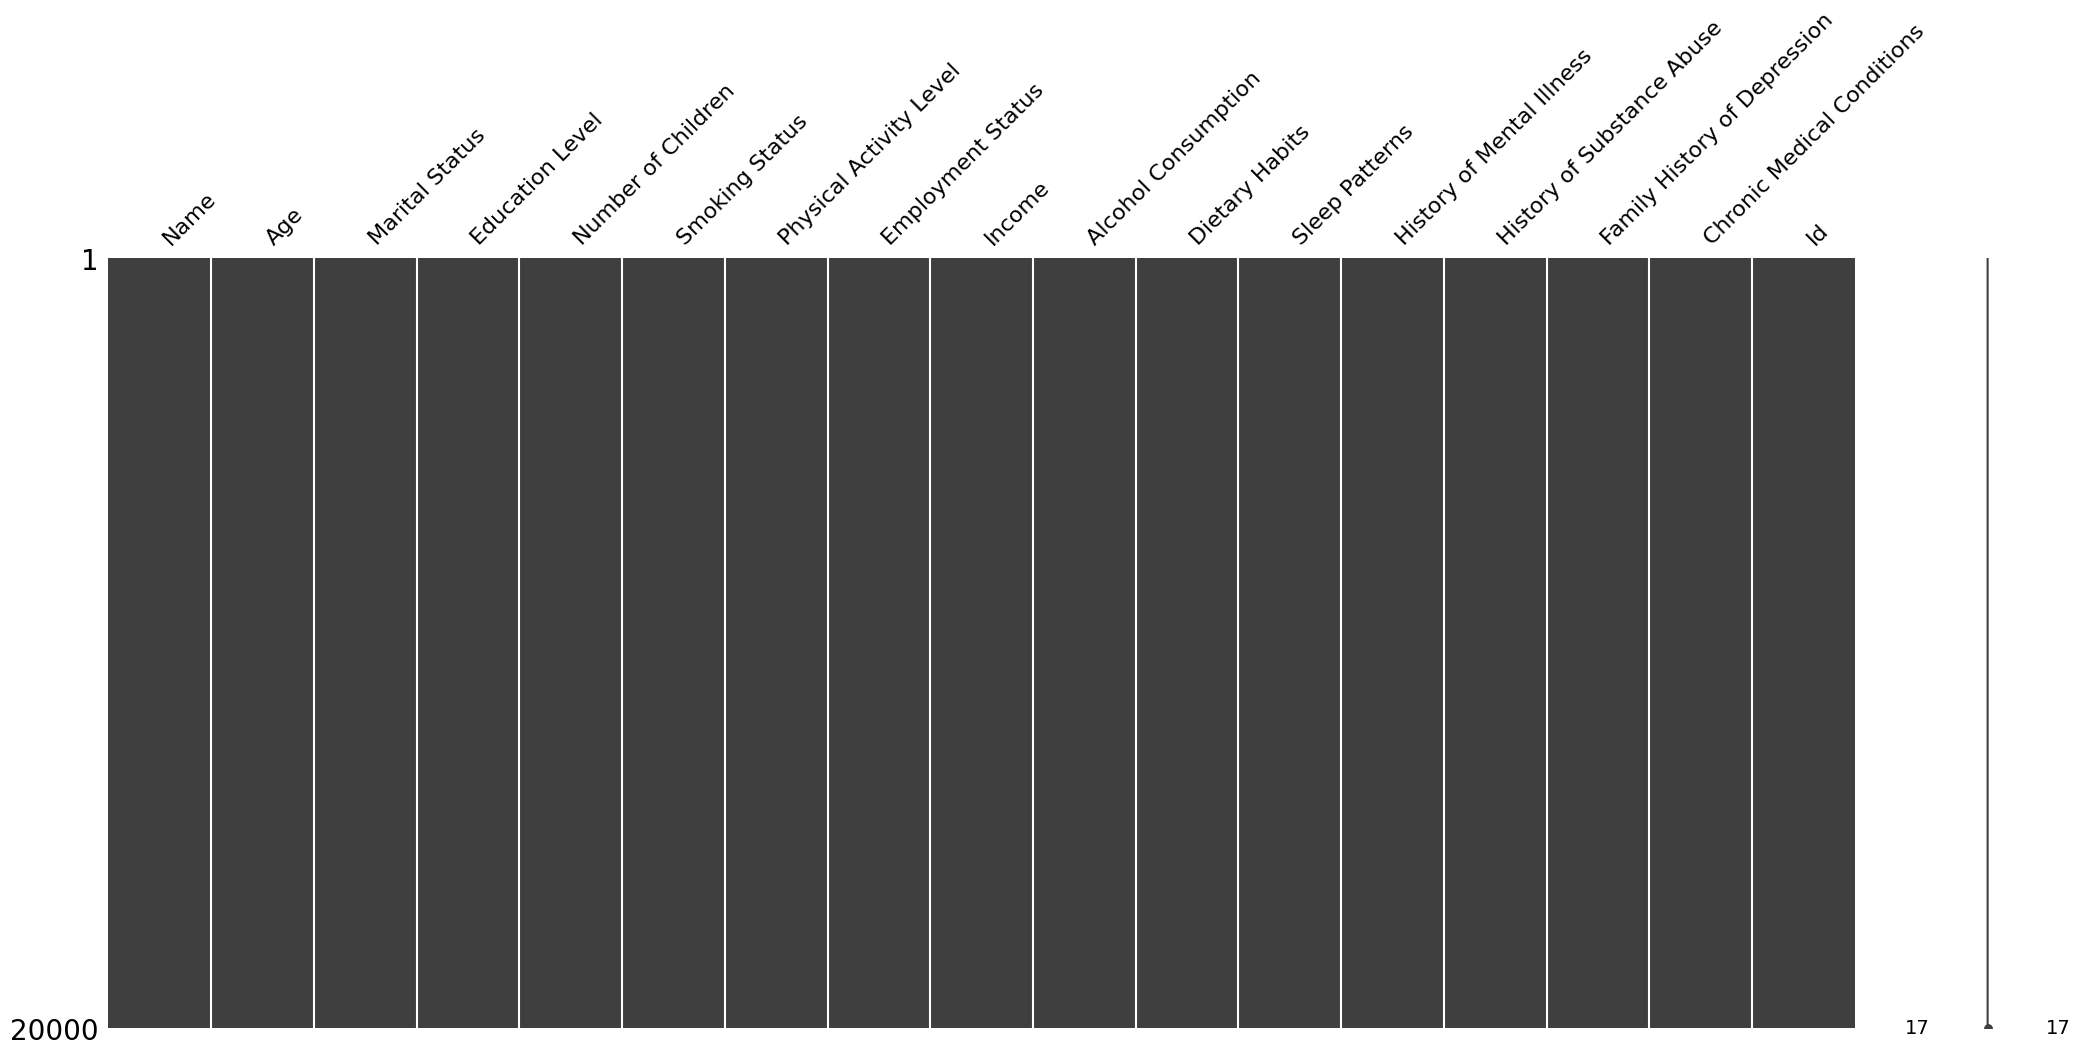

In [210]:
import missingno as msno
msno.matrix(depresion_dataset_copy)
plt.show()

## Manejo de outliers

En el siguiente paso, se identificaron los outliers para las columnas edad e ingresos utilizando la técnica de rangos intercuartiles. La estrategia para el manejo de los mismos (que sólo se encontraron para la columna 'Income') fue eliminar dichas filas con el objetivo de que los mismos no afecten el análisis que luego se realizó.

A su vez, se crea una nueva variable de dataset sin los outliers con el propósito de usar este nuevo dataset para entrenar.

NOTA: No se utilizó Z-Score ya que había demasiados outliers identificados (4000) que no se podían ver en otros gráficos.

In [211]:
depresion_dataset_copy['zscore_income'] = stats.zscore(depresion_dataset_copy['Income'])
depresion_dataset_copy['zscore_age'] = stats.zscore(depresion_dataset_copy['Age'])

Q1 = depresion_dataset_copy['Age'].quantile(0.25)
Q3 = depresion_dataset_copy['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_age = depresion_dataset_copy[(depresion_dataset_copy['Age'] < lower_bound) | (depresion_dataset_copy['Age'] > upper_bound)]

Q1_income = depresion_dataset_copy['Income'].quantile(0.25)
Q3_income = depresion_dataset_copy['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

outliers_income = depresion_dataset_copy[(depresion_dataset_copy['Income'] < lower_bound_income) | (depresion_dataset_copy['Income'] > upper_bound_income)]

both_age_and_income_outliers = pd.concat([outliers_age, outliers_income], ignore_index=True).drop_duplicates(keep=False)
#depresion_dataset_copy.drop(outliers_age, inplace= True)
rows_to_erase = list(outliers_income.index) + list(outliers_age.index)
depresion_dataset_copy.drop(rows_to_erase, inplace= True)
depresion_dataset_less_without_outliers = depresion_dataset_less.drop(rows_to_erase).copy()

shape_outliers_age = outliers_age.shape[0]
shape_outliers_income = outliers_income.shape[0]
total_outliers = shape_outliers_age + shape_outliers_income

print("Límite inferior de edad: " + str(lower_bound) + " - Límite superior: " + str(upper_bound))
print("Límite inferior de ingresos: " + str(lower_bound_income) + " - Límite superior: " + str(upper_bound_income))
print("Cantidad de outlies de edad: " + str(shape_outliers_age))
print("Cantidad de outlies de ingresos: " + str(shape_outliers_income))
print("Cantidad de total de outliers: " + str(both_age_and_income_outliers.shape[0]))
print("Filas del data set: " + str(depresion_dataset_copy.shape[0]))

Límite inferior de edad: -15.0 - Límite superior: 113.0
Límite inferior de ingresos: -63189.31999999999 - Límite superior: 161377.53999999998
Cantidad de outlies de edad: 0
Cantidad de outlies de ingresos: 244
Cantidad de total de outliers: 244
Filas del data set: 19756


## Cálculo  de medidas de tendencia central

Se calcula la moda, mediana y la media. Debido a que la mediana es menor a la media (la mediana es aproximadamente un 24.22% menor que la media) se puede decir que la media está corrida a la derecha con respecto a la mediana.

In [212]:
mean = depresion_dataset_copy['Income'].mean()
mode = depresion_dataset_copy['Income'].mode()
median = depresion_dataset_copy['Income'].median()

print("Datos sobre los ingresos")
print("Media: " + str(mean) + " - mediana: " + str(median))
print("Mode")
print(mode)

Datos sobre los ingresos
Media: 49089.9035837214 - mediana: 37199.375
Mode
0       1229.03
1       3612.15
2       3957.83
3      11068.98
4      22522.44
5      23386.01
6      23510.98
7      25856.68
8      27788.84
9      28251.77
10     33034.16
11     33322.71
12     37030.53
13     37479.27
14     37556.97
15     42905.75
16     55781.19
17     90592.48
18    100325.72
19    124798.24
Name: Income, dtype: float64


## Dispersión de datos

Se identifica la dispersión de los datos en función de varias propiedades que el mismo ofrece

**Abuso de sustancias**

En cuanto a la dispersión de los datos sobre la columna 'History of Substance Abuse' se identifica que dicho valor no depende de la edad ya que las barras son uniformes.
A su vez, a partir de la escala de ambos gráficos se identifica que hay más gente que no abusa de sustancia que la que si lo hace.


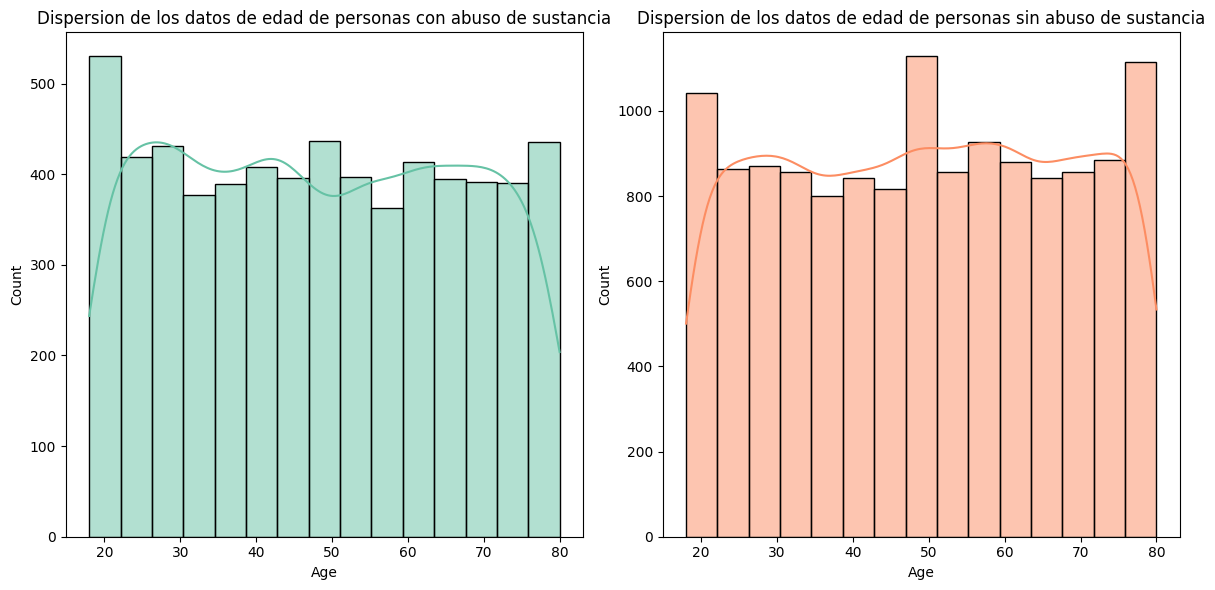

In [213]:
peoplo_with_abuse = depresion_dataset_copy[depresion_dataset_copy['History of Substance Abuse'] == "Yes"]['Age']
peoplo_without_abuse = depresion_dataset_copy[depresion_dataset_copy['History of Substance Abuse'] != "Yes"]['Age']

palette_first_color = sns.color_palette("Set2")[0]
palette_second_color = sns.color_palette("Set2")[1]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=peoplo_with_abuse, kde=True, bins= 15, ax=axs[0], color=palette_first_color)
axs[0].set_title("Dispersion de los datos de edad de personas con abuso de sustancia")

sns.histplot(data=peoplo_without_abuse, kde=True, bins= 15, ax=axs[1], color=palette_second_color)
axs[1].set_title("Dispersion de los datos de edad de personas sin abuso de sustancia")

plt.tight_layout()
plt.show()

**Ingresos de personas menores de 30 años**

Sobre la dispersión de los ingresos de personas menores de 30 años se puede afirmar que la misma no es uniforme, porque el valor de la media está corrido con respecto a la mediana, lo que significa que hay mucha gente con un ingreso bajo. Como consecuencia de que la mayor cantidad de personas tiene ingresos bajos (por estar el pico y la mayor cantidad de personas a la izquierda), la media va a ser superior a la mediana

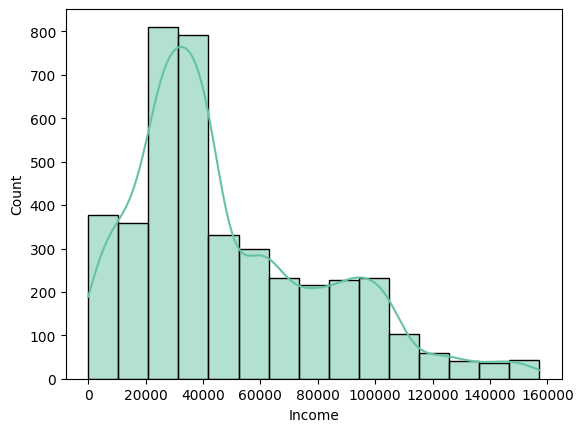

In [214]:
young_people_income = depresion_dataset_copy[depresion_dataset_copy['Age'] <= 30]['Income']
sns.histplot(data=young_people_income, kde=True, bins= 15, color= palette_first_color)
plt.show()

**Ingresos para personas con y sin problemas de abuso de sustancias**

El abuso de sustancias no influye en los ingresos de las personas sin importar la edad, ya que ambos gráficos son similares. (no hay una diferencia considerable)

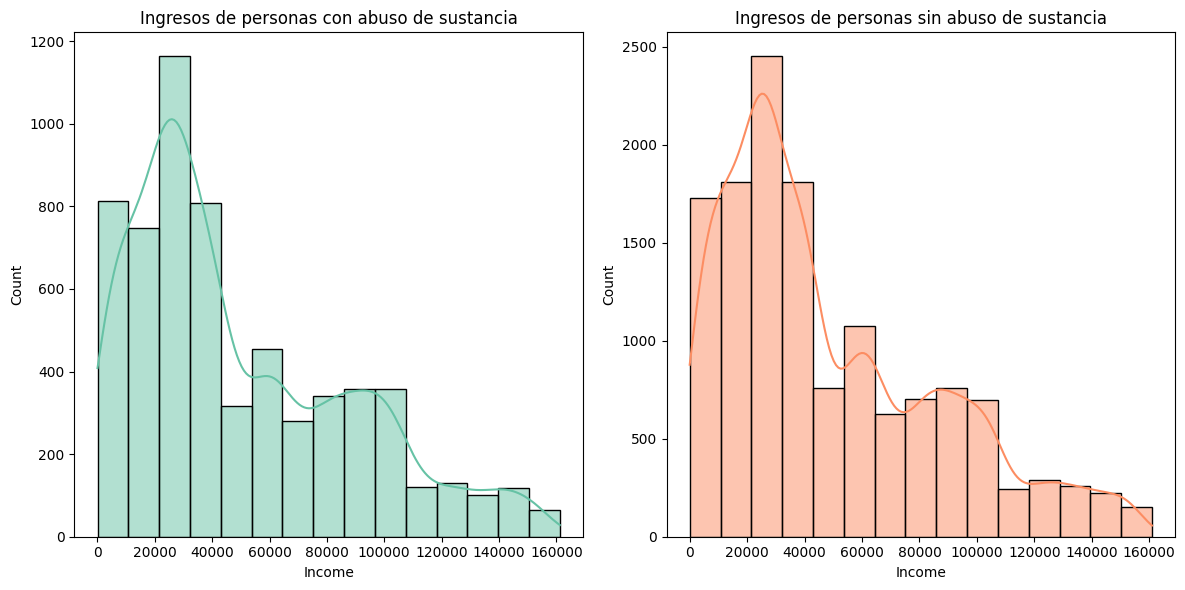

In [215]:
depresion_dataset_copy['history_of_substance_abuse'] = depresion_dataset_copy['History of Substance Abuse'].apply(lambda x: True if x == "Yes" else False)
people_income_with_abuse = depresion_dataset_copy[depresion_dataset_copy['History of Substance Abuse'] == "Yes"]['Income']
people_income_without_abuse = depresion_dataset_copy[depresion_dataset_copy['History of Substance Abuse'] == "No"]['Income']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=people_income_with_abuse, kde=True, bins= 15, ax=axs[0], color= palette_first_color)
axs[0].set_title("Ingresos de personas con abuso de sustancia")

sns.histplot(data=people_income_without_abuse, kde=True, bins= 15, ax=axs[1], color= palette_second_color)
axs[1].set_title("Ingresos de personas sin abuso de sustancia")

plt.tight_layout()
plt.show()

**Ingresos de personas con problemas mentales**

Las personas sin problemas mentales tienen ingresos similares a aquellas que sí los tienen, ya que en ambos casos se cubre todo el rango de ingresos. A su vez también se puede deducir que en el dataset hay más personas sin problemas mentales que aquellos con.


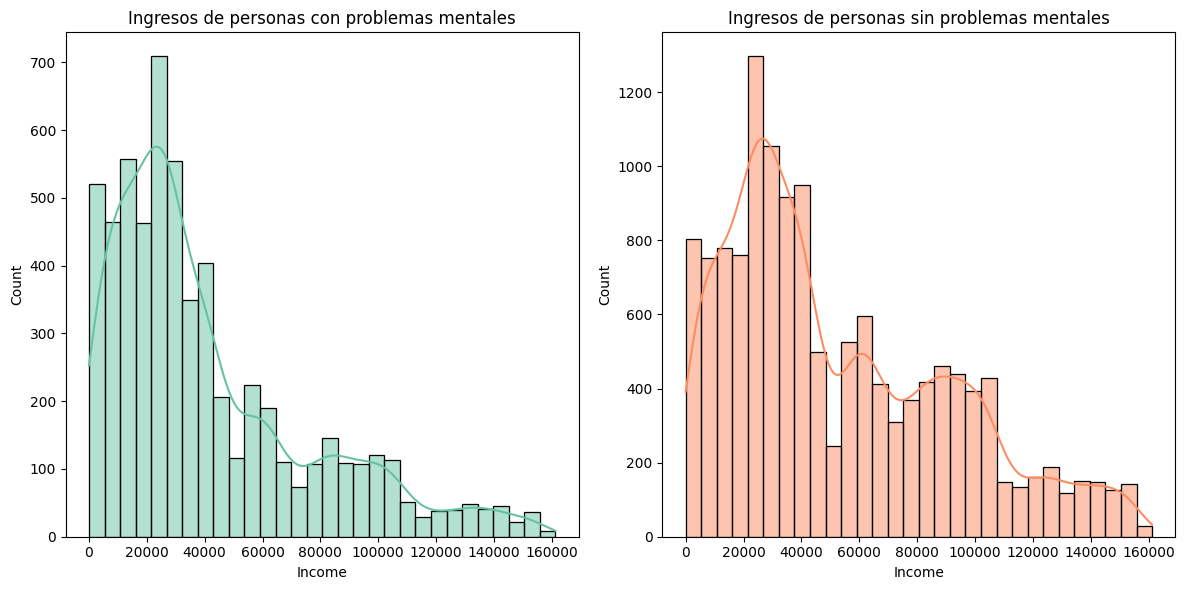

In [216]:
depresion_dataset_copy['history_of_mental_illness'] = depresion_dataset_copy['History of Mental Illness'].apply(lambda x: True if x == "Yes" else False)

people_income_with_mental_illness = depresion_dataset_copy[depresion_dataset_copy['history_of_mental_illness'] == True]['Income']
people_income_without_mental_illness = depresion_dataset_copy[depresion_dataset_copy['history_of_mental_illness'] == False]['Income']

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=people_income_with_mental_illness, kde=True, bins= 30, ax=axs[0], color= palette_first_color)
axs[0].set_title("Ingresos de personas con problemas mentales")

sns.histplot(data=people_income_without_mental_illness, kde=True, bins= 30, ax=axs[1], color= palette_second_color)
axs[1].set_title("Ingresos de personas sin problemas mentales")

plt.tight_layout()
plt.show()


**Dispersión de personas con respecto a edad e ingreso**

Sin importar la edad son relativamente pocas las personas que tienen un ingreso mayor a 110.000. También se puede afirmar que la gran mayoría de las personas que tienen menos de 20 años cobran menos que la media.

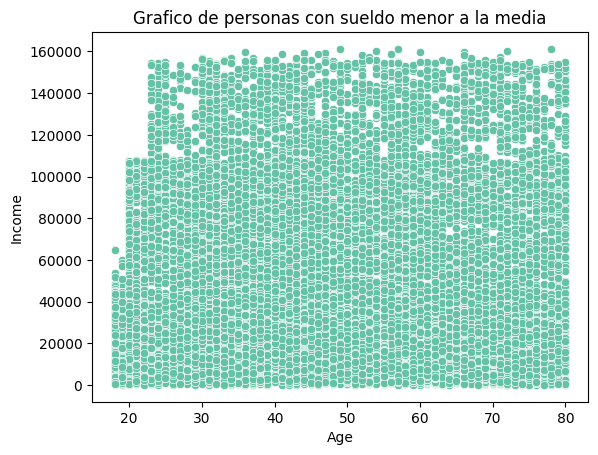

In [217]:
sns.scatterplot(x='Age', y='Income', data=depresion_dataset_copy, color= palette_first_color)
plt.title("Grafico de personas con sueldo menor a la media")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

### Relación entre edad y sueño

La mayor cantidad de gente que tiene un sueño suficiente está entre los 32/33 y los 65
La mayor cantidad de personas que tiene un sueño bueno está entre los 28 y los 60 y pico
La mayor cantidad de gente que tiene un sueño bueno está entre los 35 y 65

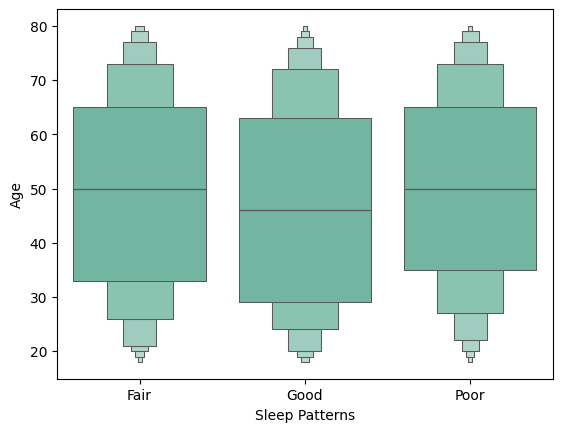

In [218]:
sns.boxenplot(x='Sleep Patterns', y='Age', data=depresion_dataset_copy, color= palette_first_color)
plt.show()

## Información sobre el número de hijos

Concentración de personas:
*   El Q1 o tiene hijos.
*   Entre los 40 y los 70 tienen 1 o 2 hijos
*   Entre los 43 y los 70 tienen 3 hijos.
*   Entre los 30 y los 40  tienen 4 hijos


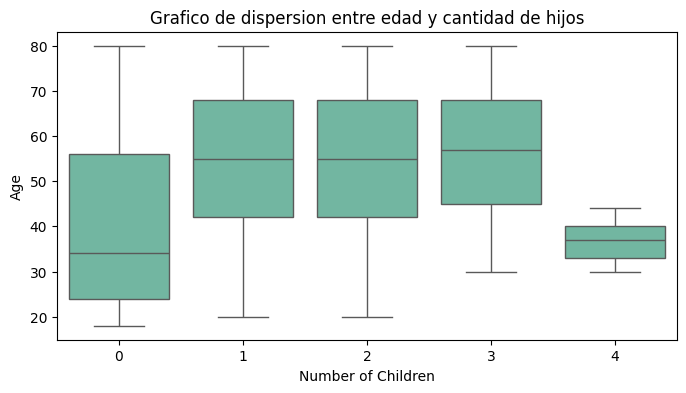

In [219]:
plt.figure(figsize=(8,4))
sns.boxplot(x="Number of Children", y="Age", data=depresion_dataset_copy, color= palette_first_color)
plt.title("Grafico de dispersion entre edad y cantidad de hijos")
plt.xlabel("Number of Children")
plt.ylabel("Age")
plt.show()

## Hipótesis 1


> Las personas con ingresos menores a la media, en su mayoría, tienen problemas mentales o con el abuso de sustancias.


Resultados de la evaluación: FALSO

Las personas con ingreso menor o igual a la media, sin importar la edad, no tienen problemas mentales o problemas de abuso de sustancias.

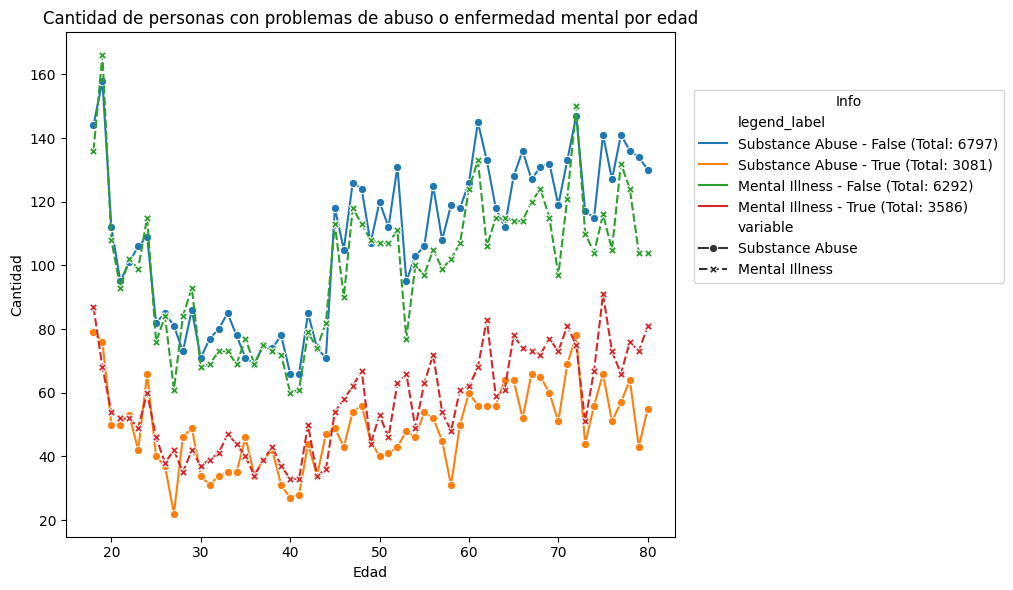

In [220]:
less_income_people = depresion_dataset_copy[depresion_dataset_copy['Income'] <= median]

# Info agrupando por edad y abuso de sustancia
group_substance = less_income_people.groupby(['Age', 'history_of_substance_abuse']).size().reset_index(name='count')
group_substance['variable'] = 'Substance Abuse'
group_substance = group_substance.rename(columns={'history_of_substance_abuse': 'value'})

# Info agrupando por edad y problemas mentales
group_mental = less_income_people.groupby(['Age', 'history_of_mental_illness']).size().reset_index(name='count')
group_mental['variable'] = 'Mental Illness'
group_mental = group_mental.rename(columns={'history_of_mental_illness': 'value'})

# Se unen los datasets
combined = pd.concat([group_substance, group_mental], ignore_index=True)

totals = combined.groupby(['variable', 'value'])['count'].sum().reset_index()

# Se crea un mapa para usar en las legendas
label_map = {
    (row['variable'], row['value']): f"{row['variable']} - {row['value']} (Total: {row['count']})"
    for _, row in totals.iterrows()
}

combined['legend_label'] = combined.apply(lambda row: label_map[(row['variable'], row['value'])], axis=1)

# Se crea el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined, x='Age', y='count', hue='legend_label', style='variable', markers=True)

plt.title('Cantidad de personas con problemas de abuso o enfermedad mental por edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.legend(title='Info', loc='upper right', bbox_to_anchor=(1.55, 0.9))
plt.tight_layout()
plt.show()


## Hipótesis 2


> Las personas que duermen lo justo tienen hábitos alimenticios no saludables, mientras que las personas que duermen bien tienen buena alimentación. Esta afirmación se puede ver en todas las edades.



Resultados de la evaluación: parte FALSO y parte VERDADERO


Al agrupar por edad (para mejorar la visibilidad del gráfico):
1. Mirando por tipo de sueño, en su mayoría las personas que duermen bien tienen hábitos alimenticios moderados o poco saludables (hay una diferencia de 54).
2. Mirando por rango etario, las personas que duermen poco en su mayoría tienen hábitos alimenticios no saludables o moderados (hay una diferencia de 53 a favor de los no saludables.).


En conclusión, la parte de la hipótesis que habla sobre las personas con pocas horas de sueño es correcta, la parte sobre las personas que duermen bien NO es correcta.


  Sleep Patterns Dietary Habits  count
0           Fair        Healthy   1585
1           Fair       Moderate   4021
2           Fair      Unhealthy   3820
3           Good        Healthy    746
4           Good       Moderate   1702
5           Good      Unhealthy   1756
6           Poor        Healthy   1097
7           Poor       Moderate   2488
8           Poor      Unhealthy   2541


<Figure size 4000x1000 with 0 Axes>

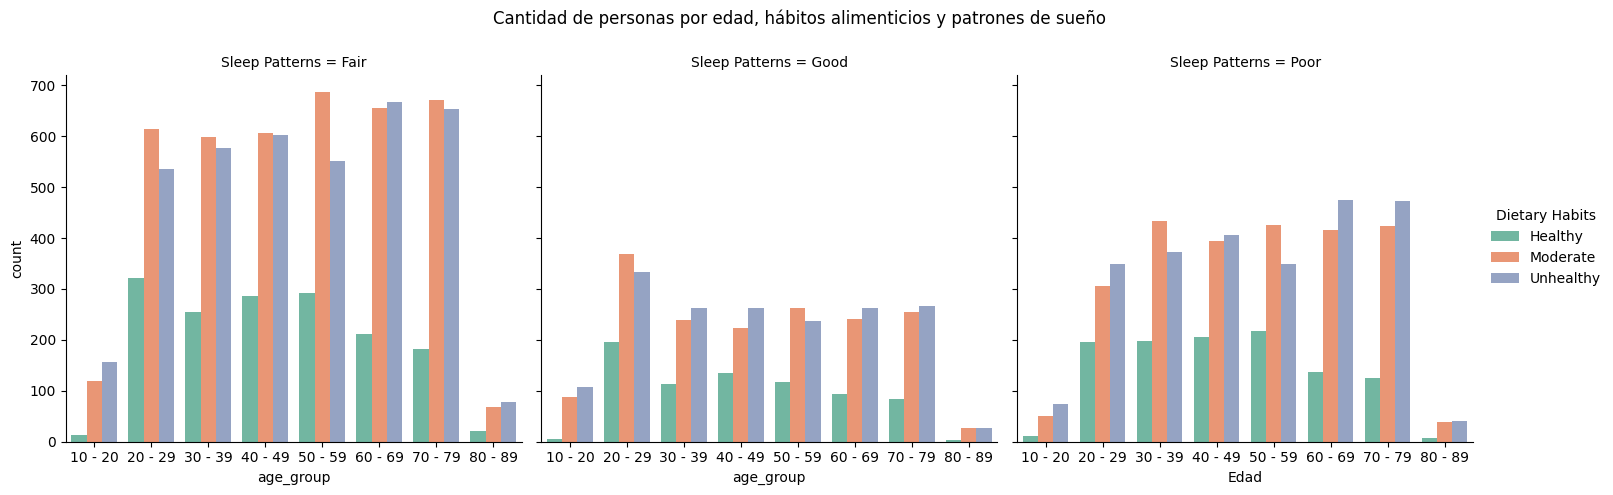

In [221]:
depresion_dataset_copy.loc[depresion_dataset_copy['Age']<=20, 'age_group'] = '10 - 20'
depresion_dataset_copy.loc[depresion_dataset_copy['Age'].between(20,29), 'age_group'] = '20 - 29'
depresion_dataset_copy.loc[depresion_dataset_copy['Age'].between(30,39), 'age_group'] = '30 - 39'
depresion_dataset_copy.loc[depresion_dataset_copy['Age'].between(40,49), 'age_group'] = '40 - 49'
depresion_dataset_copy.loc[depresion_dataset_copy['Age'].between(50,59), 'age_group'] = '50 - 59'
depresion_dataset_copy.loc[depresion_dataset_copy['Age'].between(60,69), 'age_group'] = '60 - 69'
depresion_dataset_copy.loc[depresion_dataset_copy['Age'].between(70,79), 'age_group'] = '70 - 79'
depresion_dataset_copy.loc[depresion_dataset_copy['Age'].between(80,89), 'age_group'] = '80 - 89'
depresion_dataset_copy.loc[depresion_dataset_copy['Age'].between(90,99), 'age_group'] = '90 - 99'

# Agrupo por la nueva columna, dietary habits y sleep patterns
grouped = depresion_dataset_copy.groupby(['age_group', 'Dietary Habits', 'Sleep Patterns']).size().reset_index(name='count')

# Imprimo info sobre la relación entre 'Sleep Patterns' y 'Dietary Habits' para apoyarme en el gráfico y esta
# tabla para evaluar la hipótesis.
grouped_without_age = depresion_dataset_copy.groupby(['Sleep Patterns', 'Dietary Habits']).size().reset_index(name='count')
print(grouped_without_age)

# Creo el gráfico
plt.figure(figsize=(40, 10))
g = sns.catplot(
    data=grouped, kind='bar',
    x='age_group', y='count',
    hue='Dietary Habits', col='Sleep Patterns',
    height=5,
    palette='Set2'
)

plt.subplots_adjust(top=0.85)
plt.suptitle('Cantidad de personas por edad, hábitos alimenticios y patrones de sueño')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()

## Hipótesis 3.

> La mayor parte de las personas que fuman tienen un historial de abuso de sustancias.



Resultados de la evaluación: FALSO.


El 32.9% de las personas que fuman tienen problemas de abuso de sustancias, mientras que el 67.1% (es decir la mayoría) no los tiene.

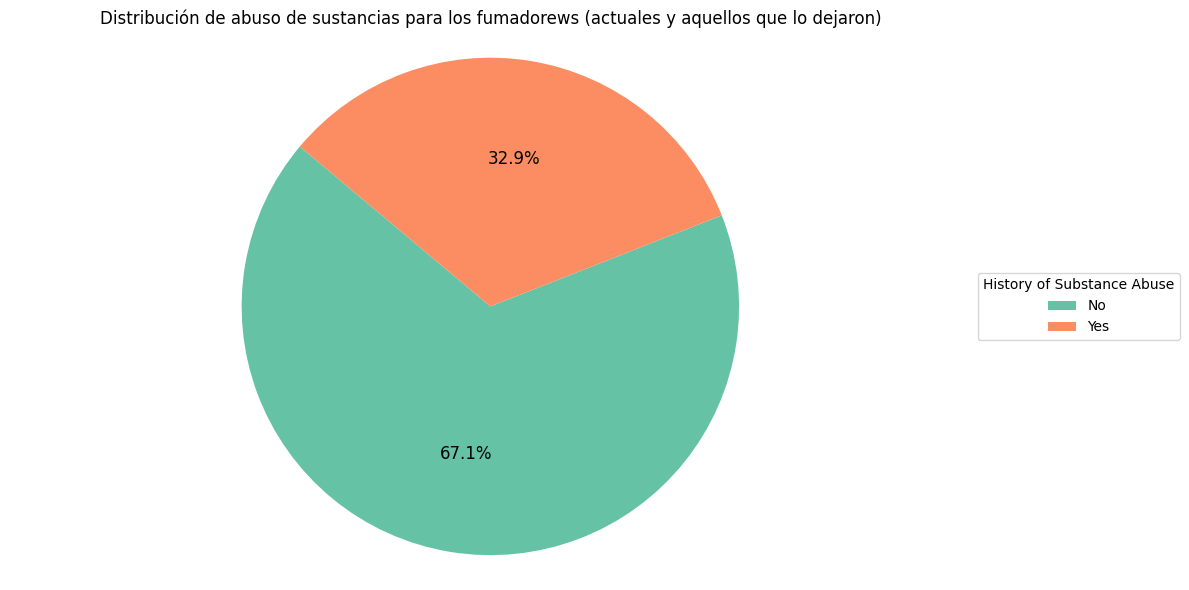

In [222]:
people_who_smoke = depresion_dataset_copy[depresion_dataset_copy['Smoking Status'] != "Non-smoker"]

people_who_smoke_group = people_who_smoke['History of Substance Abuse'].value_counts()

plt.figure(figsize=(12, 6))
wedges, texts, autotexts = plt.pie(
    people_who_smoke_group,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set2.colors,
    textprops={'fontsize': 12}
)

plt.legend(wedges, people_who_smoke_group.index, title='History of Substance Abuse', loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Distribución de abuso de sustancias para los fumadorews (actuales y aquellos que lo dejaron)')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Hipótesis 4


> Las personas con historial de abuso de sustancia en su mayoría tienen una enfermedad crónica.



Resultados de la evaluación: FALSO.

La mayor cantidad de personas que tienen un problema de sustancia no tienen ninguna enfermedad crónica. Por el contrario, en ningún grupo etario se cumple la hipótesis.

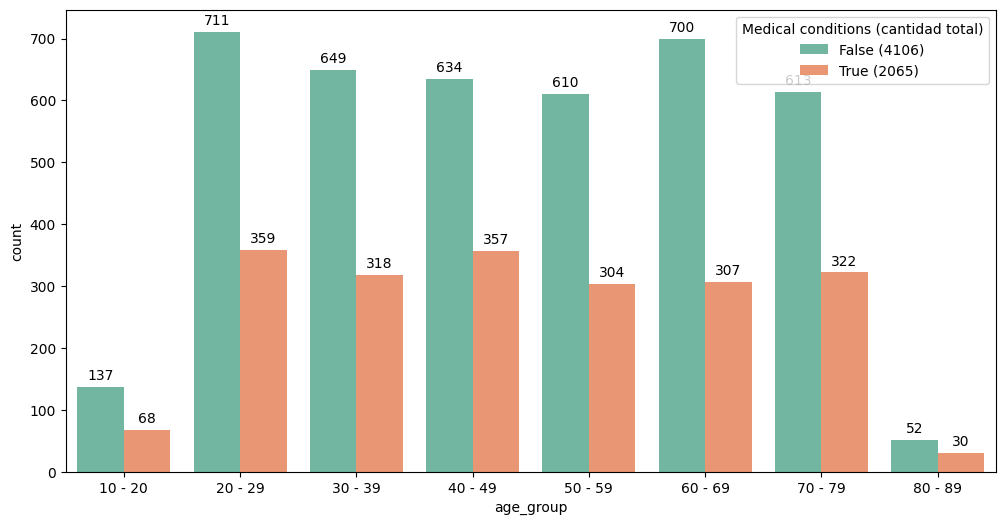

In [223]:
depresion_dataset_copy['medical_conditions'] = depresion_dataset_copy['Chronic Medical Conditions'].apply(lambda x: True if x == "Yes" else False).copy()
people_with_substance_abuse = depresion_dataset_copy[depresion_dataset_copy['history_of_substance_abuse'] == True].copy()

group_people_with_substance_abuse = people_with_substance_abuse.groupby(['age_group', 'medical_conditions']).size().reset_index(name='count')
group_people_with_substance_abuse['variable'] = 'Chronical medical conditions'

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=group_people_with_substance_abuse, x='age_group', y='count', hue= 'medical_conditions', palette="Set2")

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3)

# Agrupamos los datos por Sleep Patterns para obtener el total por grupo
group_totals = group_people_with_substance_abuse.groupby('medical_conditions')['count'].sum()

# Crear diccionario de etiquetas personalizadas
custom_labels = [f"{pattern} ({total})" for pattern, total in group_totals.items()]


handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=custom_labels, title='Medical conditions (cantidad total)')

plt.show()

## Hipótesis 5



> Las personas sin empleos tienen en su mayoría problemas para dormir y/o consumen mucho alcohol.

Resultados de la evaluación: FALSO.

La mayoría de las personas sin empleos duerme lo justo y necesario y tiene un consumo de alcohol moderado, por lo que la hipótesis planteada es errónea.


NOTA: Ambos gráficos (Facetgrid y Catplot) proveen la misma información, pero son ambas necesarias para llegar a una conclusión:
El Facetgrid permite hacer foco en donde están la mayor cantidad de personas para la columna Sleep patterns, y dentro de esta categoría me apoyo en el Catplot para validar cual es la categoría de consumo de alcohol con mayor recurrencia.



<Figure size 1500x1200 with 0 Axes>

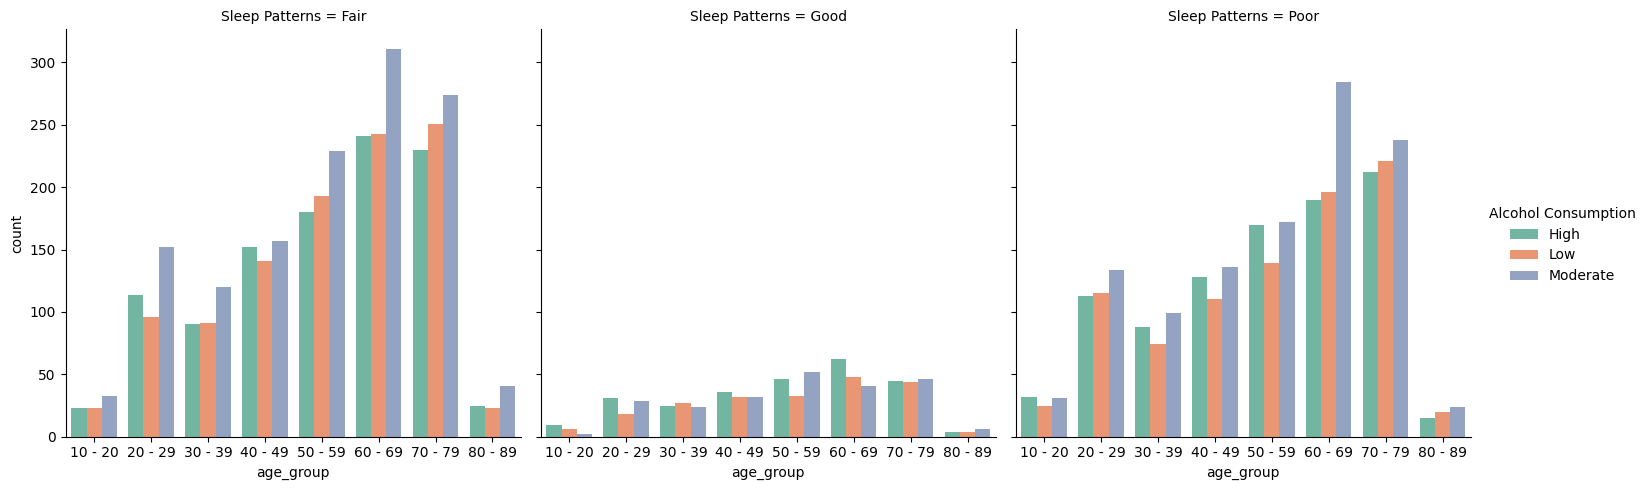

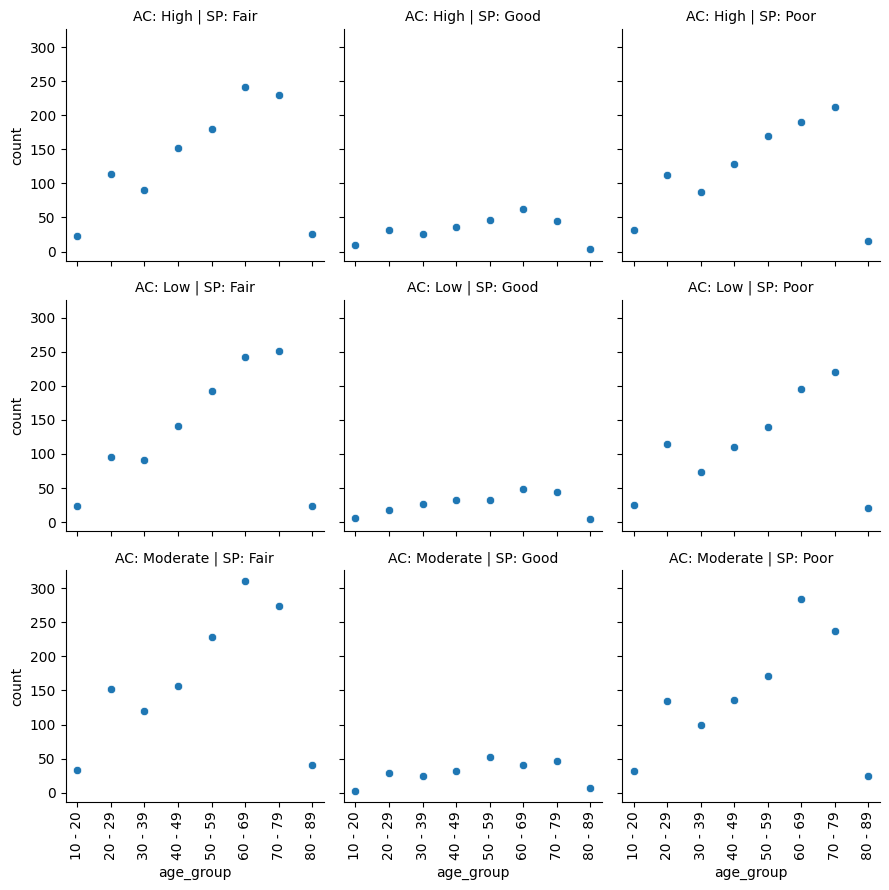

In [224]:
depresion_dataset_copy['employment_status'] = depresion_dataset_copy['Employment Status'].apply(lambda x: True if x == "Employed" else False).copy()
unemployed_people = depresion_dataset_copy[depresion_dataset_copy['employment_status'] == False]

unemployed_people.head()

unemployed_group = unemployed_people.groupby(['age_group', 'Sleep Patterns', 'Alcohol Consumption']).size().reset_index(name='count')

plt.figure(figsize=(15, 12))

sns.catplot(
    data=unemployed_group, kind='bar',
    x='age_group', y='count',
    hue='Alcohol Consumption', col='Sleep Patterns',
    height=5,
    palette='Set2'
)

g = sns.FacetGrid(unemployed_group, col='Sleep Patterns', row='Alcohol Consumption', palette="Set2")
g.map(sns.scatterplot, 'age_group', 'count')
g.set_titles(col_template="SP: {col_name}", row_template= "AC: {row_name}")

g.fig.subplots_adjust(top=0.8)

for ax in g.axes.flatten():
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)
    for label in ax.get_xticklabels():
        label.set_rotation(90)

plt.tight_layout()
plt.show()

## Hipótesis 6

> La mayoría de las personas con problemas mentales tienen historial familiar de depresión.


Resultados de la evaluación: FALSO.


En el gráfico se ve que no hay ningún grupo etario en donde las personas que tienen historial familiar de depresión
padezcan problemas mentales.


<Figure size 1200x800 with 0 Axes>

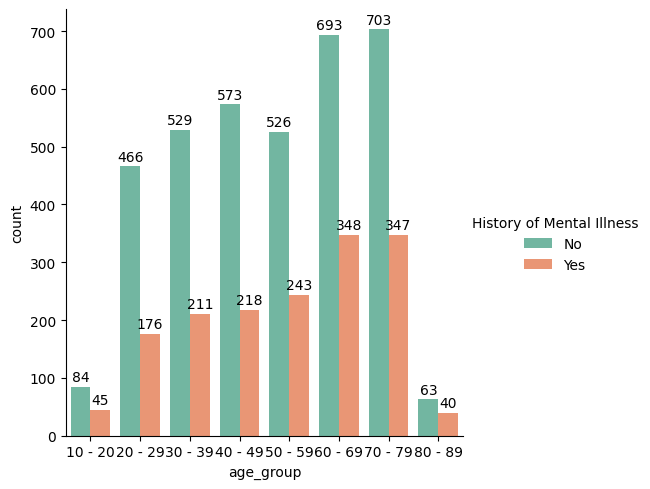

In [225]:
depresion_dataset_copy['family_histroy_of_depression'] = depresion_dataset_copy['Family History of Depression'].apply(lambda x: True if x == "Yes" else False).copy()
family_history = depresion_dataset_copy[depresion_dataset_copy['family_histroy_of_depression'] == True]

family_history_group = family_history.groupby(['age_group', 'History of Mental Illness']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))

g = sns.catplot(
    data=family_history_group, kind='bar',
    x='age_group', y='count',
    hue='History of Mental Illness',
    height=5,
    palette='Set2'
)

for ax in g.axes.flatten():
  for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2)

plt.show()

## Hipótesis 7

> Las personas que tienen un nivel de educación secundario tienen bajos ingresos y tienen problemas de abuso de sustancias.


Resultados de la evaluación: parte es VERDADERO y parte FALSO.


Siendo la media de ingresos `U$$ 49089.90`, todas las personas con un nivel de
educación secundario tienen bajos ingresos ya que la escala del gráfico solo llega a `U$$ 45.000` aproximadamente. Incluso se puede observar que la mayoría cobra entre `U$$ 20.000` y `U$$ 40.000`.

A su vez, la mayoría de las personas no tiene problemas con el abuso de sustancias.



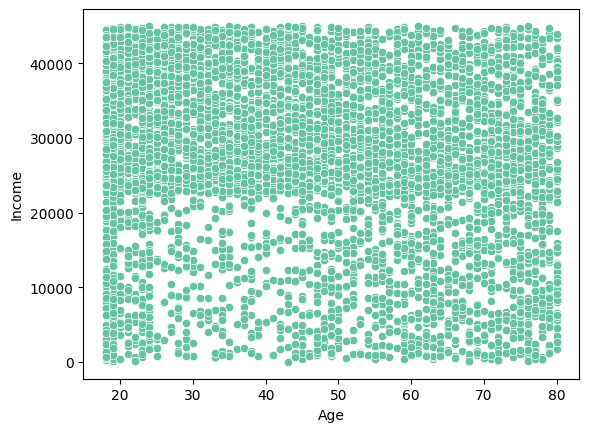

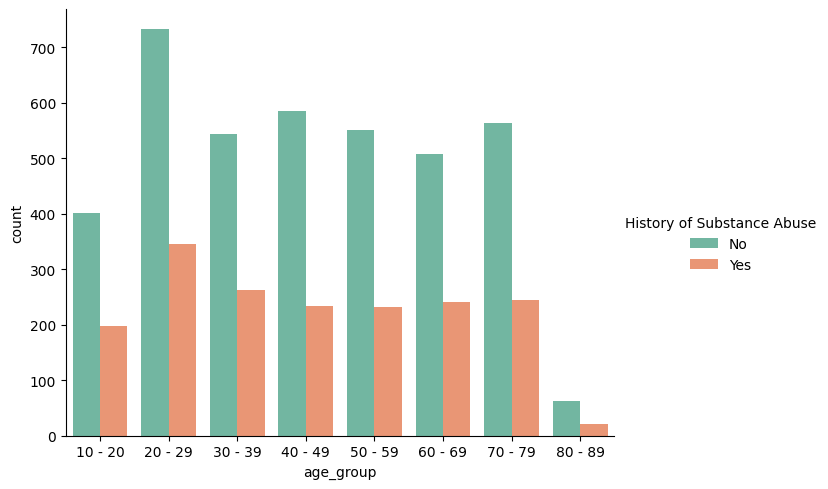

In [226]:
high_school_education_level = depresion_dataset_copy[depresion_dataset_copy['Education Level'] == "High School"]

high_school_education_level_group = high_school_education_level.groupby(['age_group', 'History of Substance Abuse']).size().reset_index(name='count')

sns.scatterplot(high_school_education_level, x='Age', y='Income', color= palette_first_color)

sns.catplot(
    high_school_education_level_group,
    x='age_group',
    y='count',
    hue='History of Substance Abuse',
    kind='bar',
    palette="Set2",
    height=5, aspect=1.3
)

plt.show()

## Hipótesis 8


> Las personas que tienen un nivel de actividad física alta llevan un nivel de vida saludable que afecta otros aspectos, por lo que la mayoría duerme bien, tiene buena alimentación y/o consume poco alcohol.

Resultados de la evaluación: parte es VERDADERO y parte FALSO.

La mayoría de las personas que tienen un nivel de actividad física alta, tiene al menos una de estas condiciones:
- Un sueño suficiente
- Una dieta moderada
- Consumo de alcohol moderado.

A su vez, con un total de 361 personas, la mayoría de las personas que tienen un nivel de actividad físico activo tienen una dieta moderada, con un consumo de alcohol moderado y a su vez descansan lo suficiente. Esto indica que la conclusión planteada no es correcta.

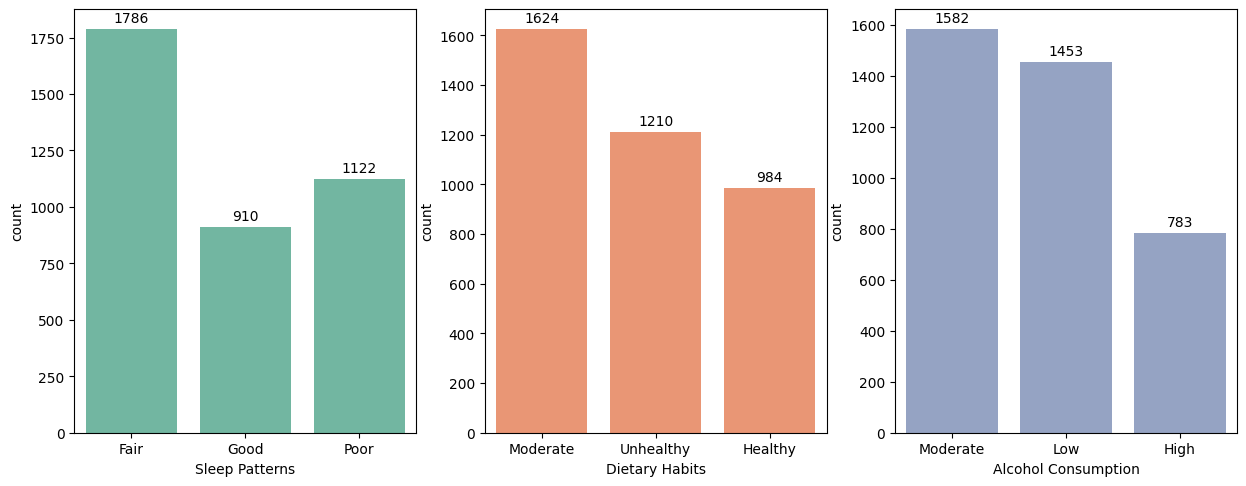

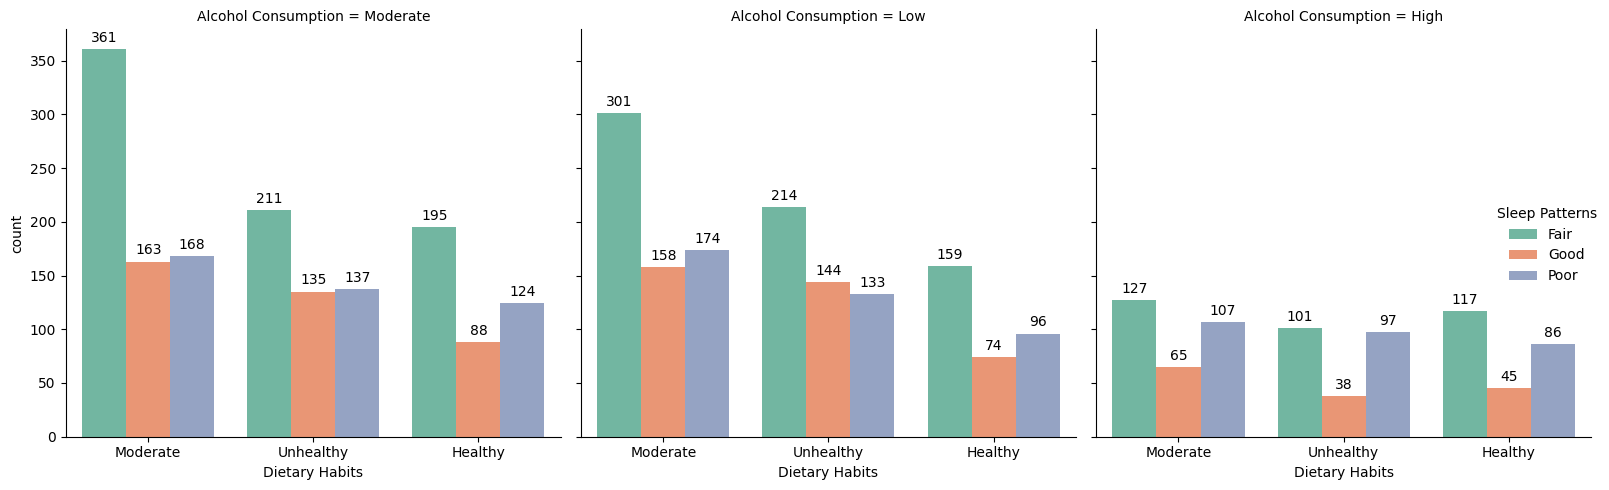

In [227]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5.5))
high_activity_performance = depresion_dataset_copy[depresion_dataset_copy['Physical Activity Level'] == "Active"]

def addLabels(ax):
  for container in ax.containers:
    ax.bar_label(container, padding=3)

sleep_count = high_activity_performance['Sleep Patterns'].value_counts()

sns.countplot(high_activity_performance, x='Sleep Patterns', ax=axes[0], color= palette_first_color)
addLabels(axes[0])

sns.countplot(high_activity_performance, x='Dietary Habits', ax=axes[1], color= palette_second_color)
addLabels(axes[1])

sns.countplot(high_activity_performance, x='Alcohol Consumption', ax=axes[2], color= sns.color_palette("Set2")[2])
addLabels(axes[2])

g = sns.catplot(
    high_activity_performance,
    x='Dietary Habits',
    hue="Sleep Patterns",
    col="Alcohol Consumption",
    kind='count',
    palette="Set2")
addLabels(g.axes[0][0])
addLabels(g.axes[0][1])
addLabels(g.axes[0][2])

plt.tight_layout()
plt.show()

## Entrenamiento del modelo

El objetivo es poder entrenar el modelo para que el mismo pueda predecir si una persona tiene o no un historial familiar de depresión.


Se utilizó un algoritmo de clasificación ya que el objetivo es poder entrenar el modelo para que a partir de nuevas entradas se pueda predecir la salida.


Además, se aplicó one hot encoding para las columnas de variables cualitativas ordinales y se utilizó label encoding para las variables cualitativas nominales. También se utilizó un mapa de calor para identificar las columnas que no tienen ninguna tipo de incidencia relevante sobre el historial familiar de depresión, siendo estas:

*   Alcohol Consumption_High
*   Alcohol Consumption_Low
*   Alcohol Consumption_Moderate
*   Income
*   Dietary Habits_Healthy
*   Dietary Habits_Moderate
*   Dietary Habits_Unhealthy

Por este motivo, las mismas se eliminaron del dataset que se iba a utilizar, con el objetivo de mejorar la performance del modelo. A su vez, la columna con mayor incidencia sobre la variable a predecir es Marital Status_Widowed


Debido a que la diferencia de exactitud entre el modelo de training y el de testing es 6% (78 % training vs 0.72% test,  es decir cercano a 5%) se puede afirmar que el modelo está bien optimizado. Sin embargo, es mejorable por lo que tiene que ser revaluado ya que la exactitud de predicción no está tan cerca del 100% como debería estarlo (entre los 90% y 95% sería un caso ideal).


También se puede afirmar que el modelo es más preciso al predecir que NO hay historial familiar de depresión, tanto en el set de datos de entrenamiento como de training.



In [228]:
depresion_dataset_less_without_outliers.head()
# Es necesario borrar las columnas Name, Id

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Id
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes,0
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes,1
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No,2
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No,3
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes,4


In [229]:
df = depresion_dataset_less_without_outliers.drop(['Name', 'Id'], axis=1)
yes_or_no_columns = ["History of Mental Illness", "History of Substance Abuse", "Chronic Medical Conditions", "Family History of Depression"]
columns = ["Marital Status","Education Level","Smoking Status","Physical Activity Level", "Employment Status", "Alcohol Consumption", "Dietary Habits", "Sleep Patterns"]

df[yes_or_no_columns] = df[yes_or_no_columns].replace({'Yes': 1, 'No': 0})

ohe_test = OneHotEncoder(sparse_output=False).fit(df[columns])
encoded_test = ohe_test.transform(df[columns])
encoded_test_df = pd.DataFrame(columns=ohe_test.get_feature_names_out(), data=encoded_test, index=df.index)
df = pd.concat([df, encoded_test_df], axis="columns") # add here label_enconded_df
df = df.drop(columns, axis=1)


<ipython-input-229-85962edf9027>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_or_no_columns] = df[yes_or_no_columns].replace({'Yes': 1, 'No': 0})


In [230]:
df.head()

,Age,Number of Children,Income,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Education Level_Associate Degree,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Smoking Status_Current,Smoking Status_Former,Smoking Status_Non-smoker,Physical Activity Level_Active,Physical Activity Level_Moderate,Physical Activity Level_Sedentary,Employment Status_Employed,Employment Status_Unemployed,Alcohol Consumption_High,Alcohol Consumption_Low,Alcohol Consumption_Moderate,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Sleep Patterns_Fair,Sleep Patterns_Good,Sleep Patterns_Poor
0,31,2,26265.67,1,0,1,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,55,1,42710.36,1,0,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,78,1,125332.79,0,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,58,3,9992.78,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,18,0,8595.08,1,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


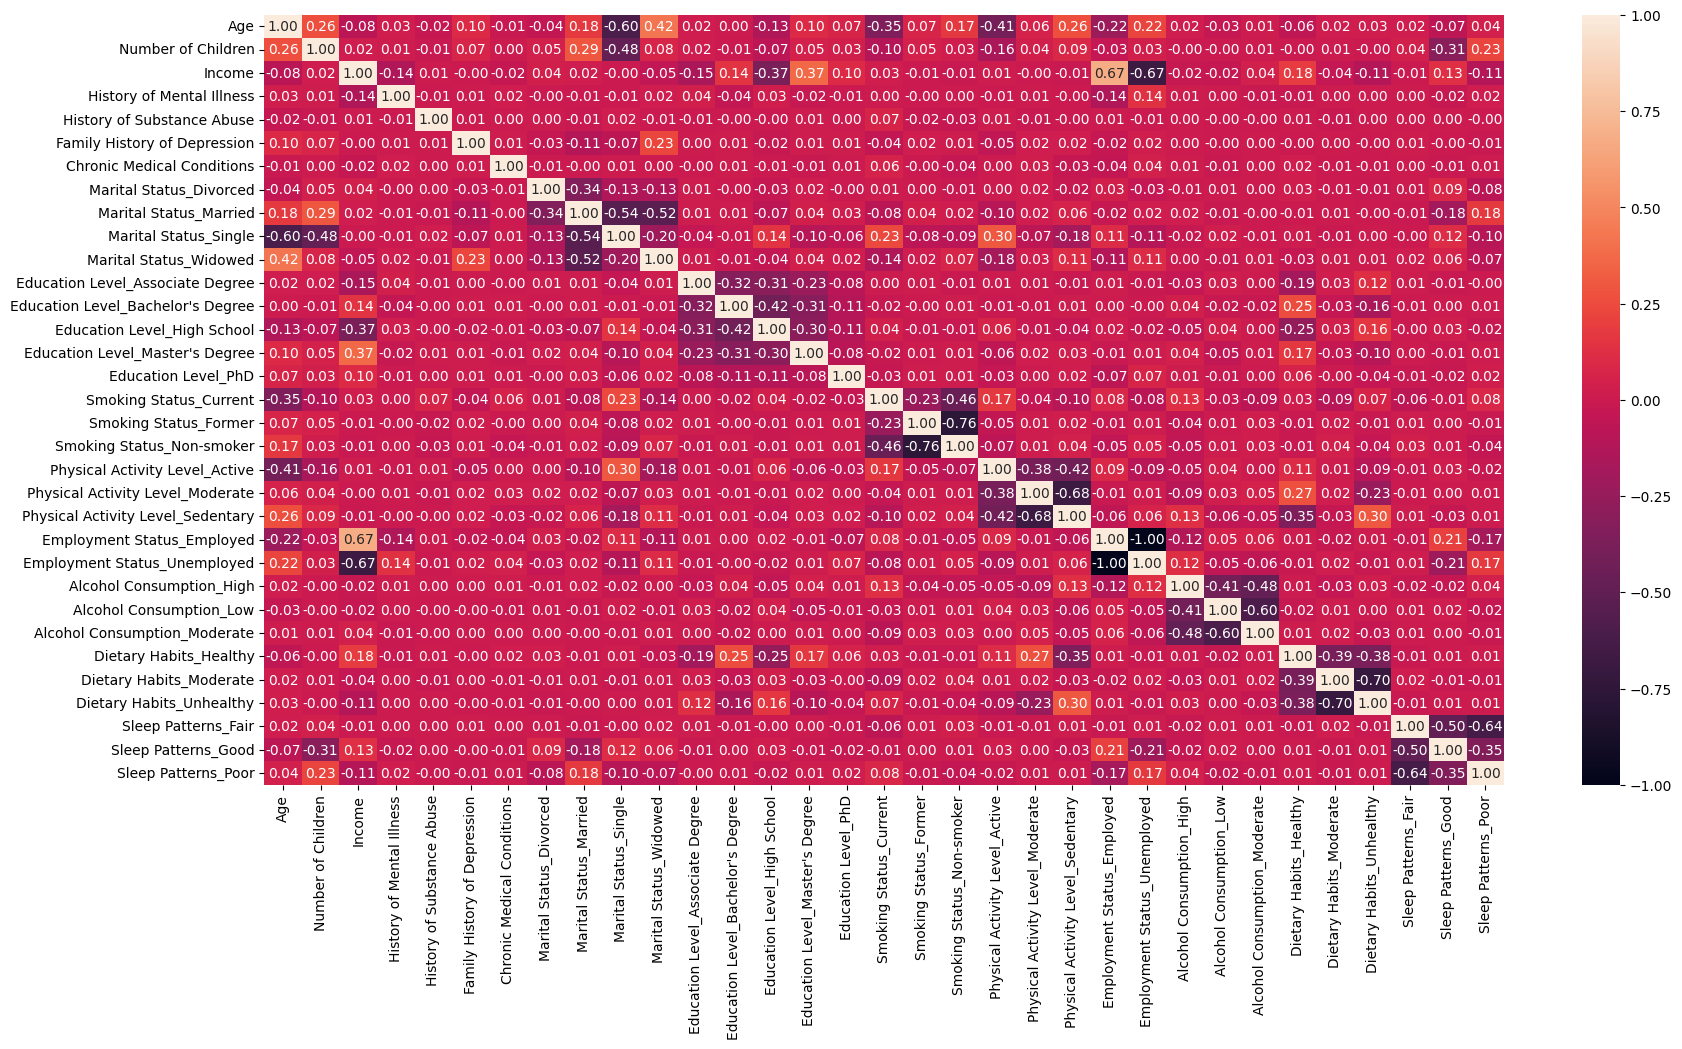

In [231]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [232]:
df_to_train = df.drop(['Alcohol Consumption_High', 'Alcohol Consumption_Low', 'Alcohol Consumption_Moderate', 'Income', 'Dietary Habits_Healthy', 'Dietary Habits_Moderate', 'Dietary Habits_Unhealthy'], axis=1)
X = df_to_train.drop(['Family History of Depression'], axis=1).copy()
y = df_to_train['Family History of Depression'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [233]:
clf = DecisionTreeClassifier(max_depth=10, random_state=42).fit(X_train, y_train)
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [234]:
print("Training")
print(classification_report(y_train, train_pred))
print("-------------------------------------------")
print("Testing")
print(classification_report(y_test, test_pred))

Training
              precision    recall  f1-score   support

           0       0.78      0.96      0.86     10144
           1       0.72      0.27      0.39      3685

    accuracy                           0.78     13829
   macro avg       0.75      0.62      0.63     13829
weighted avg       0.77      0.78      0.74     13829

-------------------------------------------
Testing
              precision    recall  f1-score   support

           0       0.75      0.92      0.83      4347
           1       0.43      0.16      0.24      1580

    accuracy                           0.72      5927
   macro avg       0.59      0.54      0.53      5927
weighted avg       0.67      0.72      0.67      5927



## Clustering


Se aplicó un algoritmo de clustering para poder encontrar algún patrón en el conjunto de datos. Luego de aplicar la técnica del codo, y agrupar por 4 y 7 clusters se optó que la mejor forma de clustering fue el de 7, siendo estos:




*  Empleados en su mayoría casados, no fumadores, con al menos un hijo:


**Cluster 0:** "*Persona promedio*": ingresos cercanos a la mediana, mayormente con solo estudios secundarios, actividad física moderada o activa, consumen comida normal o no saludable (el mayor porcentaje)


**Cluster 1, cluster con mayor tamaño:** "*Los vagos*": ingresos superan la mediana, con nivel de estudio variados, sedentarios, consumen comida normal (el mayor porcentaje) o no saludable


**Cluster 2 cluster con menor tamaño:** "*Los fit*": ingresos superan ampliamente la mediana, con estudios superiores, actividad física moderada o activa, consumen comida sana




*  Mixtos (Mayoritariamente empleados):


**Cluster 4**: "*Los descarrilados*": Máximo un hijo, mayor porcentaje de historial de abuso de sustancias y de condición médica crónica, mixto entre casados y solteros, fumadores, activos, consumo alto de alcohol, dieta no saludable, duermen poco



**Cluster 5**: "*Los que comienzan*": Sin hijos, solteros, no fumadores, activos, jóvenes, consumo poco o moderado de alcohol, dieta moderada, duermen lo justo. Es el grupo con personas más jóvenes.


*  Desempleados, casados/viudos con hijos y bajos ingresos, grupo con mayor porcentaje de historial de problemas mentales:


**Cluster 3:** "*Los rela**": no fumadores, sedentarios, no comen sano


**Cluster 6:** "*Los V.E.T: Vuelven En Track*": no fumadores, actividad física moderada, dieta moderada




Se puede afirmar que hay una relación entre la edad y la cantidad de hijos (a menor edad, menor cantidad de hijos)
Me gustaría también mencionar que estaría bueno encontrar mejores nombres para estos grupos.




*rela como alias de "relajados"

In [235]:
def fit_kmeans_and_score(k, data):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(data)
  inertia_val = kmeans.inertia_
  silhouette_val = silhouette_score(data, kmeans.labels_) if k > 1 else None
  return inertia_val, silhouette_val

In [236]:
scaler = StandardScaler()
df_to_cluster = df.copy()
df_processed = scaler.fit_transform(df_to_cluster)

In [237]:
inertia = []
silhouette_scores = []
k_values = range(2, 16)

for k in k_values:
  inertia_val, silhouette_val = fit_kmeans_and_score(k, df_processed)
  inertia.append(inertia_val)
  silhouette_scores.append(silhouette_val)


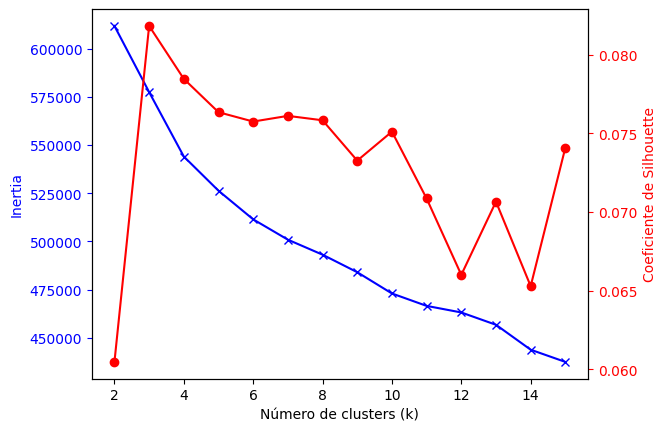

In [238]:
fig, ax1 = plt.subplots()
ax1.plot(k_values, inertia,"bx-", label='Inertia')
ax1.set_xlabel('Número de clusters (k)')
ax1.set_ylabel('Inertia', color='b')
ax1.tick_params("y", colors="b")

ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores,"ro-", label='Coeficiente de Silhouette')
ax2.set_ylabel('Coeficiente de Silhouette', color="r")
ax2.tick_params("y", colors="r")

plt.show()

In [239]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(df_processed)
cluster_labels = kmeans_4.predict(df_processed)
cluster_labels

array([3, 1, 1, ..., 0, 3, 1], dtype=int32)

In [240]:
df_to_cluster_4 = df_to_cluster.copy()
df_to_cluster_4["cluster_4"] = cluster_labels
average_by_clusters = df_to_cluster_4.groupby("cluster_4").mean()
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
average_by_clusters

,Age,Number of Children,Income,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Education Level_Associate Degree,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Smoking Status_Current,Smoking Status_Former,Smoking Status_Non-smoker,Physical Activity Level_Active,Physical Activity Level_Moderate,Physical Activity Level_Sedentary,Employment Status_Employed,Employment Status_Unemployed,Alcohol Consumption_High,Alcohol Consumption_Low,Alcohol Consumption_Moderate,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Sleep Patterns_Fair,Sleep Patterns_Good,Sleep Patterns_Poor
cluster_4,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,25.083698,0.004958,47012.279574,0.301546,0.337125,0.197434,0.342082,0.002916,0.016915,0.979586,0.000583,0.167104,0.291630,0.450569,0.085739,0.004958,0.310586,0.197725,0.491689,0.475941,0.286381,0.237679,0.750948,0.249052,0.233887,0.366288,0.399825,0.161563,0.413823,0.424614,0.470691,0.312628,0.216681
1,52.792566,1.594853,59916.067104,0.264761,0.304503,0.274053,0.306505,0.098642,0.717513,0.000000,0.183846,0.289207,0.197284,0.366833,0.129807,0.016869,0.077913,0.301072,0.621015,0.102645,0.259757,0.637598,1.000000,0.000000,0.211294,0.362259,0.426447,0.004289,0.428878,0.566833,0.478771,0.247605,0.273624
2,47.575502,1.540830,95968.359469,0.217434,0.317239,0.274465,0.325988,0.119896,0.715489,0.031432,0.133182,0.009721,0.567077,0.009073,0.371355,0.042774,0.146468,0.277058,0.576474,0.264096,0.719054,0.016850,0.999676,0.000324,0.201231,0.327609,0.471160,0.584251,0.360985,0.054763,0.460467,0.244977,0.294556
3,58.543868,1.526897,14944.569617,0.391290,0.305155,0.292027,0.356708,0.074768,0.674672,0.001921,0.248639,0.189241,0.304195,0.252962,0.205091,0.048511,0.056996,0.296670,0.646334,0.104547,0.402177,0.493276,0.000000,1.000000,0.319244,0.307717,0.373039,0.166667,0.428754,0.404579,0.487032,0.103106,0.409862


*Características*

**Cluster 0:** Los empleados solteros: se caracterizan por no tener hijos ni tampoco estudios superiores. Otro rasgo a destacar es que se preocupan por su salud (ya que tiene un nivel de actividad física activa y no fuman).

**Cluster 1:** Los empleados casados/viudos: que por el contrario son sedentarios.

**Cluster 2:** Los jefes: es el grupo de empleados que poseen un ingreso elevado y además tienen estudios superiores.

**Cluster 3:** Los desempleados: en su mayoría casados o viudos.

Falencia del clustering: si bien los empleados se pudieron dividir en subgrupos, los desempleados solo representan un grupo. A su vez, hay clusters con similar cantidad de integrantes, lo que da la sensación que no hubo un cluster en donde iban los descartes.

In [241]:
test_count = df_to_cluster_4.copy()
test_count['cluster'] = kmeans_4.labels_

# Cuenta cuántas personas hay en cada clúster
count_cluster4 = test_count['cluster'].value_counts().sort_index()

print(count_cluster4)

cluster
0    3429
1    6995
2    3086
3    6246
Name: count, dtype: int64


In [242]:
kmeans_7 = KMeans(n_clusters=7, random_state=42)
kmeans_7.fit(df_processed)
cluster_labels = kmeans_7.predict(df_processed)
df_to_cluster_7 = df_to_cluster.copy()
df_to_cluster_7["cluster_7"] = cluster_labels
average_by_clusters = df_to_cluster_7.groupby("cluster_7").mean()
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
average_by_clusters

,Age,Number of Children,Income,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Education Level_Associate Degree,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Smoking Status_Current,Smoking Status_Former,Smoking Status_Non-smoker,Physical Activity Level_Active,Physical Activity Level_Moderate,Physical Activity Level_Sedentary,Employment Status_Employed,Employment Status_Unemployed,Alcohol Consumption_High,Alcohol Consumption_Low,Alcohol Consumption_Moderate,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Sleep Patterns_Fair,Sleep Patterns_Good,Sleep Patterns_Poor
cluster_7,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,49.635181,1.557153,49166.545838,0.279603,0.296715,0.270705,0.299795,0.114990,0.739562,0.000000,0.145448,0.352498,0.194730,0.438398,0.012320,0.002053,0.001027,0.337098,0.661875,0.277207,0.721766,0.001027,1.000000,0.000000,0.021218,0.479124,0.499658,0.000000,0.607118,0.392882,0.471937,0.241958,0.286105
1,56.425511,1.588448,71453.808096,0.241877,0.300842,0.283514,0.299158,0.084477,0.694826,0.000241,0.220457,0.190854,0.313598,0.259206,0.208905,0.027437,0.000963,0.319856,0.679182,0.000481,0.000000,0.999519,1.000000,0.000000,0.309266,0.292419,0.398315,0.000000,0.399519,0.600481,0.492900,0.252708,0.254392
2,49.562743,1.544261,101919.571858,0.208658,0.305934,0.274319,0.302529,0.117704,0.683852,0.043774,0.154669,0.000000,0.471304,0.000000,0.473249,0.055447,0.020428,0.316634,0.662938,0.233463,0.763132,0.003405,1.000000,0.000000,0.183366,0.309825,0.506809,0.807393,0.192607,0.000000,0.472763,0.261187,0.266051
3,62.067644,1.510497,15012.546838,0.387537,0.306564,0.306231,0.314562,0.059314,0.640786,0.008331,0.291569,0.184605,0.316561,0.247917,0.201599,0.049317,0.007664,0.315228,0.677108,0.001666,0.000000,0.998334,0.000000,1.000000,0.303232,0.324892,0.371876,0.001000,0.409530,0.589470,0.488171,0.093635,0.418194
4,31.288187,0.889225,51759.215569,0.303332,0.395500,0.212029,0.404154,0.082215,0.461272,0.433579,0.022934,0.202077,0.286889,0.346603,0.150584,0.013847,1.000000,0.000000,0.000000,0.387278,0.318910,0.293812,0.760277,0.239723,0.407616,0.299437,0.292947,0.188230,0.298139,0.513630,0.386846,0.201644,0.411510
5,25.130813,0.000000,47874.431412,0.284224,0.308561,0.204694,0.320730,0.000435,0.000869,0.998696,0.000000,0.171230,0.293785,0.458062,0.073881,0.003042,0.000000,0.280748,0.719252,0.467623,0.284659,0.247718,0.767058,0.232942,0.148196,0.402868,0.448935,0.135159,0.470665,0.394176,0.512821,0.374185,0.112994
6,56.477741,1.512292,14913.956465,0.409302,0.292691,0.283056,0.396678,0.079402,0.682392,0.017276,0.220930,0.189369,0.299003,0.253156,0.208970,0.049502,0.011628,0.310631,0.677741,0.182724,0.817276,0.000000,0.000000,1.000000,0.324917,0.291362,0.383721,0.338538,0.458472,0.202990,0.494352,0.100332,0.405316


*Características*


*   Empleados en su mayoría casados, no fumadores, con al menos un hijo:


**Cluster 0**: Empleados, ingresos cercanos a la mediana, mayormente con solo estudios secundarios, actividad física moderada o activa, consumen comida normal o no saludable (el mayor porcentaje)


**Cluster 1, cluster con mayor tamaño**: Empleados, ingresos superan la mediana, con nivel de estudio variados, sedentarios, consumen comida normal (el mayor porcentaje) o no saludable


**Cluster 2 cluster con menor tamaño **: Empleados, ingresos superan ampliamente la mediana, con estudios superiores, actividad física moderada o activa, consumen comida sana


*   Mixtos (Mayoritariamente empleados):


**Cluster 4**: Máximo un hijo, mayor porcentaje de historial de abuso de sustancias y de condición médica crónica, mixto entre casados y solteros, Fumadores, activos, consumo alto de alcohol, dieta no saludable, duermen poco


**Cluster 5**: Sin hijos, solteros, No fumadores, activos, jóvenes, consumo poco o moderado de alcohol, dieta moderada, duermen lo justo. Es el grupo con personas más jóvenes.


*   Desempleados, grupo con mayor porcentaje de historial de problemas mentales:


**Cluster 3**: Con hijos, bajos ingresos, casados/viudos, no fumadores, sedentarios, no comen sano


**Cluster 6**: Con hijos, bajos ingresos, casados/viudos, no fumadores, actividad física moderada, dieta moderada


Se puede afirmar que hay una relación entre la edad y la cantidad de hijos (a menor edad, menor cantidad de hijos)


In [243]:
test_count_7 = df_to_cluster_7.copy()
test_count_7['cluster'] = kmeans_7.labels_

# Cuenta cuántas personas hay en cada clúster
count_cluster_7 = test_count_7['cluster'].value_counts().sort_index()

print(count_cluster_7)

cluster
0    2922
1    4155
2    2056
3    3001
4    2311
5    2301
6    3010
Name: count, dtype: int64


## Clustering de personas con problemas mentales


El objetivo es poder agrupar los datos de las personas con historial de problemas mentales por medio del uso del algoritmo K Means.


El primer paso fue crear un mapa de calor, para identificar variables que no tienen incidencia en sobre la variable que quiero agrupar, para evitar influenciar el modelo. Producto de esto,  se identificaron las columnas a borrar que, según el mapa de calor, no tenían relación con la columna de interés:


*  Dietary Habits_Moderate
*  Dietary Habits_Unhealthy
*  Dietary Habits_Healthy
*  Smoking Status_Current
*  Smoking Status_Former
*  Smoking Status_Non-smoker


Luego, se filtraron las filas para quedarme con los datos que quería analizar, y luego se borraron las columnas mencionadas previamente más la columna 'History of Mental Illness'.


El siguiente paso fue usar la técnica del codo para poder seleccionar posibles valores para usar como número de clusters. Luego de hacer pruebas, se optó agrupar los datos en 3:


**Tier bajo (Cluster 1 / cant: 1034)**: personas con bajos ingresos ya que no tienen empleo (esto último podemos asociarlo). Su estado civil es casados o viudos y es el cluster más chico.


**Tier medio (Cluster 0 / cant: 2438)**: personas con ingresos medio, todos solteros, donde se pueden encontrar personas con y sin empleo.




**Tier alto (Cluster 2 / cant: 2529)**: son personas en su mayoría casadas con ingresos altos(por encima de la media), lo que permite deducir que ocupan cargos altos/jerárquicos.


Si bien este agrupamiento permitió subdividir a las personas con empleos, todas las personas sin empleos quedaron en un mismo grupo. Cabe destacar que la cantidad de personas entre el Tier medio y el Tier alto es parejo, lo que indica una distribución pareja de los datos para personas con empleo. De igual forma, estaría bueno poder explorar un poco más las características de cada grupo ya que no se pudo encontrar un patrón que permita identificar qué tienen en común todas las personas con problemas mentales.




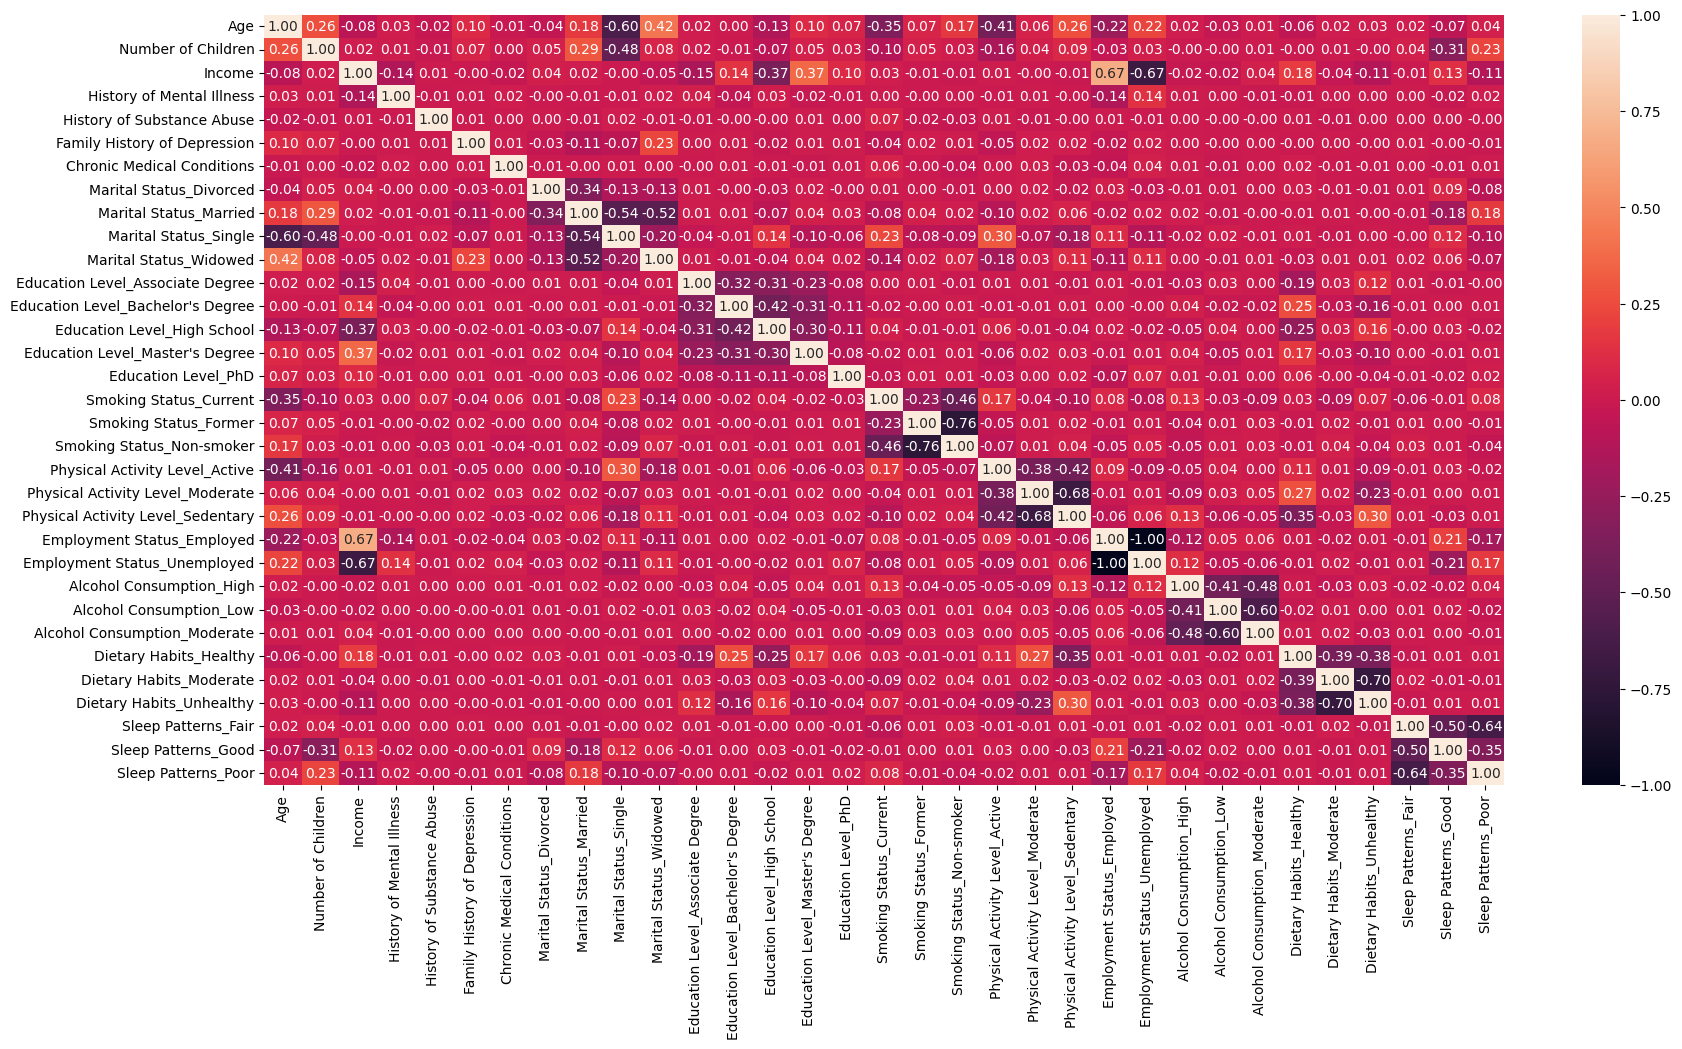

In [244]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [245]:
scaler = StandardScaler()
df_to_cluster_mental_illnesses = df[df['History of Mental Illness'] == 1].copy()
df_to_cluster_mental_illnesses.drop(['History of Mental Illness', 'Dietary Habits_Moderate','Dietary Habits_Unhealthy','Dietary Habits_Healthy','Smoking Status_Current','Smoking Status_Former','Smoking Status_Non-smoker'	], axis=1, inplace=True)
df_to_cluster_mental_illnesses.head()
df_processed_mental_illnesses = scaler.fit_transform(df_to_cluster_mental_illnesses)

In [246]:
inertia = []
silhouette_scores = []
k_values = range(2, 16)

for k in k_values:
  inertia_val, silhouette_val = fit_kmeans_and_score(k, df_processed_mental_illnesses)
  inertia.append(inertia_val)
  silhouette_scores.append(silhouette_val)


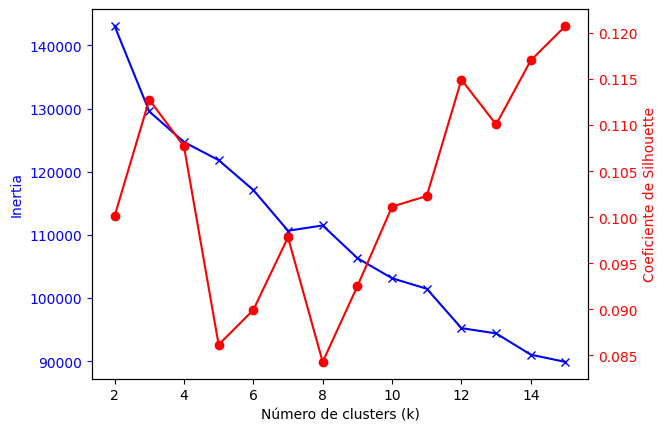

In [247]:
fig, ax1 = plt.subplots()
ax1.plot(k_values, inertia,"bx-", label='Inertia')
ax1.set_xlabel('Número de clusters (k)')
ax1.set_ylabel('Inertia', color='b')
ax1.tick_params("y", colors="b")

ax2 = ax1.twinx()
ax2.plot(k_values, silhouette_scores,"ro-", label='Coeficiente de Silhouette')
ax2.set_ylabel('Coeficiente de Silhouette', color="r")
ax2.tick_params("y", colors="r")

plt.show()

In [248]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_processed_mental_illnesses)
cluster_labels = kmeans.predict(df_processed_mental_illnesses)
df_to_cluster_mental_illnesses["cluster_3"] = cluster_labels
average_by_clusters_mental_illnesses = df_to_cluster_mental_illnesses.groupby(["cluster_3"]).mean()
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
average_by_clusters_mental_illnesses


,Age,Number of Children,Income,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Education Level_Associate Degree,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Physical Activity Level_Active,Physical Activity Level_Moderate,Physical Activity Level_Sedentary,Employment Status_Employed,Employment Status_Unemployed,Alcohol Consumption_High,Alcohol Consumption_Low,Alcohol Consumption_Moderate,Sleep Patterns_Fair,Sleep Patterns_Good,Sleep Patterns_Poor
cluster_3,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24.937137,0.000000,43048.953133,0.340426,0.191489,0.357834,0.000000,0.000000,1.0,0.000000,0.186654,0.261122,0.452611,0.092843,0.006770,0.456480,0.299807,0.243714,0.682785,0.317215,0.248549,0.361702,0.389749,0.478723,0.280464,0.240812
1,58.689910,1.557424,14817.852408,0.302297,0.289992,0.361772,0.074651,0.678015,0.0,0.247334,0.195242,0.311321,0.247744,0.198934,0.046760,0.102953,0.414274,0.482773,0.000000,1.000000,0.321165,0.312551,0.366284,0.497949,0.107465,0.394586
2,51.367339,1.606564,65570.509482,0.302096,0.285884,0.329379,0.111111,0.714116,0.0,0.174773,0.245552,0.252274,0.308027,0.176750,0.017398,0.164887,0.391854,0.443258,1.000000,0.000000,0.194543,0.360221,0.445235,0.459075,0.252274,0.288652


In [249]:
test_count = df_to_cluster_mental_illnesses.copy()
test_count['cluster'] = kmeans.labels_

# Cuenta cuántas personas hay en cada clúster
count_mental_illness = test_count['cluster'].value_counts().sort_index()

print(count_mental_illness)

cluster
0    1034
1    2438
2    2529
Name: count, dtype: int64


cluster
0    1034
1    2438
2    2529

*Características*

**Cluster 0**: Ingresos medio, soltero, mixto sobre empleo

**Cluster 1**: Ingresos bajos, casados/viudos, sin empleo

**Cluster 2**: Ingresos altos, casados/viudos/divorciados, con empleo


In [250]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_processed_mental_illnesses)
cluster_labels = kmeans.predict(df_processed_mental_illnesses)
df_to_cluster_mental_illnesses["cluster_4"] = cluster_labels
average_by_clusters_mental_illnesses = df_to_cluster_mental_illnesses.groupby("cluster_4").mean()
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
average_by_clusters_mental_illnesses

,Age,Number of Children,Income,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Education Level_Associate Degree,Education Level_Bachelor's Degree,Education Level_High School,Education Level_Master's Degree,Education Level_PhD,Physical Activity Level_Active,Physical Activity Level_Moderate,Physical Activity Level_Sedentary,Employment Status_Employed,Employment Status_Unemployed,Alcohol Consumption_High,Alcohol Consumption_Low,Alcohol Consumption_Moderate,Sleep Patterns_Fair,Sleep Patterns_Good,Sleep Patterns_Poor,cluster_3
cluster_4,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24.938953,0.000000,42759.348411,0.342054,0.191860,0.356589,0.000000,0.000000,0.999031,0.000969,0.187016,0.261628,0.454457,0.091085,0.005814,0.458333,0.299419,0.242248,0.682171,0.317829,0.249031,0.363372,0.387597,0.480620,0.278101,0.241279,0.001938
1,58.711997,1.558340,14814.197707,0.302383,0.290058,0.361956,0.073541,0.679129,0.000000,0.247329,0.195152,0.311832,0.247740,0.198439,0.046836,0.102712,0.414133,0.483155,0.000000,1.000000,0.321693,0.312654,0.365653,0.498767,0.105998,0.395234,1.000000
2,50.549206,1.832275,65903.097852,0.313757,0.276190,0.330159,0.081481,0.802116,0.000000,0.116402,0.245503,0.260847,0.298413,0.177778,0.017460,0.172487,0.379365,0.448148,1.000000,0.000000,0.201058,0.356085,0.442857,0.613757,0.000000,0.386243,2.000000
3,53.641860,0.936434,64688.527860,0.265116,0.313178,0.328682,0.201550,0.449612,0.004651,0.344186,0.244961,0.224806,0.333333,0.178295,0.018605,0.141085,0.429457,0.429457,0.993798,0.006202,0.173643,0.368992,0.457364,0.000000,1.000000,0.000000,1.984496


In [251]:
test_count = df_to_cluster_mental_illnesses.copy()
test_count['cluster'] = kmeans.labels_

# Cuenta cuántas personas hay en cada clúster
count_mental_illness = test_count['cluster'].value_counts().sort_index()

print(count_mental_illness)

cluster
0    1032
1    2434
2    1890
3     645
Name: count, dtype: int64


*Características*


**Cluster 0:** Jóvenes, ingresos medios, solteros , activos, empleados y desempleados, duermen poco y algunos bien, sin hijos.

**Cluster 1:** Mediana edad, pocos ingresos, casados/viudos sin hijos, poca actividad, desempleados, duermen poco

**Cluster 2:** Mediana edad, ingresos altos, casados/viudos sin hijos, poca actividad, empleados, duermen poco

**Cluster 3:** Mediana edad, ingresos altos, casados/viudos/divorciados sin hijos, poca actividad, empleados, duermen bien

Mejorable división del conjunto de datos, ya que existen características que se comparten en varios grupos. Considero mejor el agrupamiento en tres grupos. A su vez, la cantidad de integrantes de los clusters es dispar y este número de cluster no parce ser acertado ya que el coeficiente de Silhouette baja.